# Anuran Families Recognition

## Importing the libraries

In [122]:
import pathlib
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

DATA_DIR = pathlib.Path('./data/')


## Importing the dataset

In [101]:
data = pd.read_csv(DATA_DIR / 'Frogs_MFCCs.csv')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [102]:
targets = data['Family']
data.drop('Family', axis=1, inplace=True)

In [103]:
data.shape

(7195, 25)

## Preprocessing the dataset

In [104]:
data = pd.get_dummies(data, columns=['Genus', 'Species'])

In [105]:
scalar = StandardScaler()
data_scaled = scalar.fit_transform(data)

## Splitting the dataset into the Training set and Test set

In [106]:
train_data, test_data, train_targets, test_targets = train_test_split(
    data_scaled, targets, test_size=0.3, random_state=42)


In [113]:
train_data.shape, test_data.shape

((5036, 41), (2159, 41))

## Training the linear SVM model on the training set

In [107]:
linear_SVM = SVC(kernel='linear', C=1.0, random_state=42)
linear_SVM.fit(train_data, train_targets)

SVC(kernel='linear', random_state=42)

### Evaluating the model on the training set

In [108]:
linear_SVM.score(train_data, train_targets)

1.0

### Evaluating the model on the test set

In [109]:
linear_SVM.score(test_data, test_targets)

1.0

### Support Vectors

In [110]:
linear_SVM.support_vectors_

array([[  0.14657792,   2.40150058,   1.46296075, ...,  -0.12688349,
         10.23761806,  -0.14492013],
       [  0.14657792,   0.78134133,   1.53722708, ...,  -0.12688349,
         10.23761806,  -0.14492013],
       [-12.18700091,   3.09377119,   0.01973705, ...,  -0.12688349,
         10.23761806,  -0.14492013],
       ...,
       [  0.14657792,  -1.3049755 ,  -1.00601519, ...,  -0.12688349,
         -0.09767897,  -0.14492013],
       [  0.14657792,  -0.06698475,  -0.80110222, ...,  -0.12688349,
         -0.09767897,  -0.14492013],
       [ -7.8566975 ,   3.09377119,  -1.0839114 , ...,  -0.12688349,
         -0.09767897,  -0.14492013]])

In [111]:
linear_SVM.support_vectors_.shape

(109, 41)

In [112]:
number_of_support_vectors = linear_SVM.support_vectors_.shape[0]
number_of_support_vectors

109

### Confusion Matrix of the test set

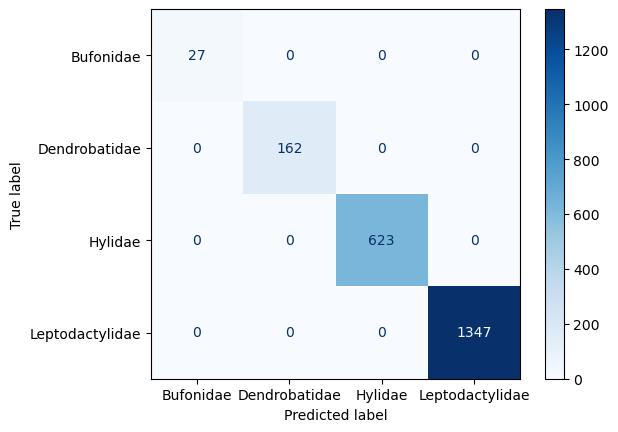

In [123]:
cm = confusion_matrix(test_targets, linear_SVM.predict(test_data))
cm_plot = ConfusionMatrixDisplay(
    cm, display_labels=linear_SVM.classes_)
cm_plot.plot(cmap='Blues')
plt.show()
